In [1]:
file_names = ["Rolling3Games.csv", "Rolling5Games.csv", "Rolling9Games.csv", "Rolling15Games.csv", "Rolling20Games.csv"]

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import RollingHelper as h
import itertools
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
# for easier reading np
np.set_printoptions(precision=3,suppress=True)

In [3]:
# get dictionary of column names
col_dict = h.getColDict()
home_col_dict = dict(itertools.islice(col_dict.items(), 12))
away_col_dict = dict(itertools.islice(col_dict.items(), 12, 24))
home_indices = list(range(12))
away_indices = list(range(12, 24))

In [14]:

# initialize accuaracy matrix and max accuracy vector
mat_length = 0
for i in range(1, 25):
    mat_length = mat_length + len(list(itertools.combinations(home_indices, i)))
acc_matrix = np.zeros((len(file_names), mat_length))
print(acc_matrix)

max_acc_vec = np.zeros(12)
# list to hold all the max accuracy feature selections
max_acc_indices = []


# loop through data files
for fname_ind in range(len(file_names)):
    with open(f'../../data/{file_names[fname_ind]}', 'r') as f: 
        temp = np.genfromtxt(f,delimiter=',', skip_header = 1)

    #split feature matrix and label vector
    X = temp[:, 1:]
    y = temp[:, 0]
    
    # split training and testing data
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)
    
    # keep track of acc_matrix index
    index = 0
    
    for i in range(1, 13):
        
        # keep track of max accuracy and feature selections
        max_acc = -1
        max_features = []
    
        # get list of possible feature selections length 1
        home_feature_subsets = list(itertools.combinations(home_indices, i))
        away_feature_subsets = list(itertools.combinations(away_indices, i))
        
        # loop through the list of feature subsets
        for j in range(len(home_feature_subsets)):
            feature_list = home_feature_subsets[j] + away_feature_subsets[j]
            #print(feature_list)
            # Feature Selection
            X_train_sub = X_train[:,  feature_list]
            X_test_sub = X_test[:, feature_list]

            # Decision Tree Model
            clf = DecisionTreeClassifier(random_state=0)
            clf = clf.fit(X_train_sub, y_train)
            # get accuracy
            acc = clf.score(X_test_sub,y_test)
            acc_matrix[fname_ind][index] = acc
            index = index+1
            
            if acc > max_acc:
                max_acc = acc
                max_features = feature_list
                
        # store max accuracy and feature selection
        max_acc_vec[i-1] = max_acc
        max_acc_indices.append(max_features)
        print(max_acc)
        print(max_features)

            
print(acc_matrix)    
    

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
0.5280160091480847
(11, 23)
0.5500285877644369
(6, 11, 18, 23)
0.5528873642081189
(2, 3, 7, 14, 15, 19)
0.5668953687821612
(1, 2, 8, 11, 13, 14, 20, 23)
0.5657518582046884
(0, 1, 3, 7, 9, 12, 13, 15, 19, 21)
0.5677530017152659
(0, 2, 3, 7, 9, 11, 12, 14, 15, 19, 21, 23)
0.566609491137793
(1, 2, 5, 6, 8, 9, 11, 13, 14, 17, 18, 20, 21, 23)
0.5703259005145798
(0, 4, 5, 6, 7, 8, 9, 11, 12, 16, 17, 18, 19, 20, 21, 23)
0.5726129216695255
(0, 2, 3, 4, 5, 6, 7, 9, 11, 12, 14, 15, 16, 17, 18, 19, 21, 23)
0.5700400228702116
(2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23)
0.565180102915952
(0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23)
0.5405946255002859
(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23)
0.5245854774156661
(1, 13)
0.5408805031446541
(5, 11, 17, 23)
0.544882790165809
(1, 2, 6, 13, 14, 18)
0.5485991995425957
(2, 4, 7, 11, 14, 16, 19, 23)
0

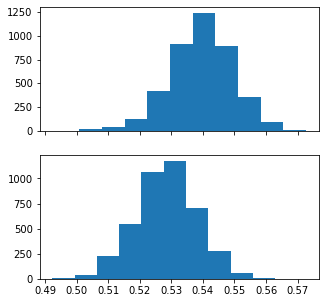

In [20]:
# Plot Histograms of accuracies
fig, axes = plt.subplots(nrows=len(file_names), ncols=1, figsize=(5, 5), sharex=True)
for r in range(len(acc_matrix)):
    axes[r].hist(acc_matrix[r])
    

In [3]:
# split training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)
print("Size of training feature matrix: "+str(X_train.shape))
print("Size of testing feature matrix: "+str(X_test.shape))
print("Size of training label vector: "+str(y_train.shape))
print("Size of testing label vector: "+str(y_test.shape))

Size of training feature matrix: (8161, 24)
Size of testing feature matrix: (3498, 24)
Size of training label vector: (8161,)
Size of testing label vector: (3498,)


In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# feature selection

X_train_pts = X_train[:, [ col_dict['FGA_HOME_avg'], col_dict['DREB_HOME_avg'], col_dict['PTS_HOME_avg'], 
                          col_dict['FGA_AWAY_avg'], col_dict['OREB_AWAY_avg'], col_dict['PTS_AWAY_avg']]]
X_test_pts = X_test[:, [col_dict['FGA_HOME_avg'], col_dict['DREB_HOME_avg'], col_dict['PTS_HOME_avg'], 
                          col_dict['FGA_AWAY_avg'], col_dict['OREB_AWAY_avg'], col_dict['PTS_AWAY_avg']]]

In [7]:
X_train_pts

array([[ 80.66666667,  30.93333333,  97.4       ,  82.33333333,
          9.93333333, 107.33333333],
       [ 77.86666667,  32.06666667,  97.66666667,  79.06666667,
          9.46666667,  93.73333333],
       [ 85.06666667,  32.2       ,  94.86666667,  82.2       ,
         10.46666667,  98.93333333],
       ...,
       [ 90.8       ,  35.2       , 110.06666667,  90.26666667,
         11.33333333, 110.2       ],
       [ 82.53333333,  31.8       ,  97.8       ,  80.73333333,
         11.86666667,  93.        ],
       [ 81.13333333,  32.2       ,  96.13333333,  88.33333333,
         10.13333333, 103.06666667]])

In [8]:
# Decision Tree Model
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=0)
clf = clf.fit(X_train_pts, y_train)
y_hat = clf.predict(X_test_pts)

In [9]:
# Determine DT performance
from sklearn.metrics import confusion_matrix

Cmat = confusion_matrix(y_test, y_hat)
acc = clf.score(X_test_pts,y_test)

print("Confusion Matrix: ")
print(Cmat)
print("Accuracy: " + str(format(acc*100,'.2f')) + '%')

Confusion Matrix: 
[[ 679  773]
 [ 819 1227]]
Accuracy: 54.49%
